# Assignment

- Create and copy this file in folder `BME11`, name your new file's name as your group number (ex: group1.ipynb)
- Visualize data from `datasets/2019_nCoV_data.csv`

2019 Novel Coronavirus (2019-nCoV) is a virus (more specifically, a coronavirus) identified as the cause of an outbreak of respiratory illness first detected in Wuhan, China. Early on, many of the patients in the outbreak in Wuhan, China reportedly had some link to a large seafood and animal market, suggesting animal-to-person spread. However, a growing number of patients reportedly have not had exposure to animal markets, indicating person-to-person spread is occurring. At this time, it’s unclear how easily or sustainably this virus is spreading between people - CDC

This dataset has daily level information on the number of affected cases, deaths and recovery from 2019 novel coronavirus.

The data is available from 22 Jan 2020.

source: [kaggle](https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset)

## 0. Group Members

Firstname Lastname (Nickname) Student id.
Nuathong Reungsang (Mook) 6113079
Supapitch Chartvivatpornchai (morm) 6113095

## 1. Read coronavirus data from `2019_nCoV_data.csv`

In [8]:
from os import path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import r2_score
import seaborn as sns
color = sns.color_palette()
sns.set()

In [15]:
def dp(dataFileName):
    '''
    This function is used to get full data path (dp) from data file name.
    '''
    return path.join('datasets', dataFileName)

In [16]:
FileName = '2019_nCoV_data.csv'
df = pd.read_csv(dp(FileName), encoding='utf-8')

## 2. Show dataframe

In [17]:
df

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020 12:00:00,Anhui,China,01/22/2020 12:00:00,1.0,0.0,0.0
1,2,01/22/2020 12:00:00,Beijing,China,01/22/2020 12:00:00,14.0,0.0,0.0
2,3,01/22/2020 12:00:00,Chongqing,China,01/22/2020 12:00:00,6.0,0.0,0.0
3,4,01/22/2020 12:00:00,Fujian,China,01/22/2020 12:00:00,1.0,0.0,0.0
4,5,01/22/2020 12:00:00,Gansu,China,01/22/2020 12:00:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
765,766,02/04/2020 22:00:00,"Boston, MA",US,2020-01-02 19:43:00,1.0,0.0,0.0
766,767,02/04/2020 22:00:00,"Los Angeles, CA",US,2020-01-02 19:53:00,1.0,0.0,0.0
767,768,02/04/2020 22:00:00,"Orange, CA",US,2020-01-02 19:53:00,1.0,0.0,0.0
768,769,02/04/2020 22:00:00,"Seattle, WA",US,2020-01-02 19:43:00,1.0,0.0,0.0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770 entries, 0 to 769
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sno             770 non-null    int64  
 1   Date            770 non-null    object 
 2   Province/State  585 non-null    object 
 3   Country         770 non-null    object 
 4   Last Update     770 non-null    object 
 5   Confirmed       770 non-null    float64
 6   Deaths          770 non-null    float64
 7   Recovered       770 non-null    float64
dtypes: float64(3), int64(1), object(4)
memory usage: 48.2+ KB


## 3. Show which countries that affected by the virus and how many cases have been reported

In [18]:
countries = df ['Country'].unique().tolist()
print(countries)
print("\nTotal country affected by Corona virus:", len(countries))

['China', 'US', 'Japan', 'Thailand', 'South Korea', 'Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'Singapore', 'Philippines', 'Malaysia', 'Vietnam', 'Australia', 'Mexico', 'Brazil', 'France', 'Nepal', 'Canada', 'Cambodia', 'Sri Lanka', 'Ivory Coast', 'Germany', 'Finland', 'United Arab Emirates', 'India', 'Italy', 'Sweden', 'Russia', 'Spain', 'UK', 'Belgium']

Total country affected by Corona virus: 32


In [31]:
df['Country'].replace({'Mainland China' : 'China'}, inplace=True)
countries = df['Country'].unique().tolist()
print(countries)
print("\nTotal countries affected by virus: ",len(countries))

['China', 'US', 'Japan', 'Thailand', 'South Korea', 'Hong Kong', 'Macau', 'Taiwan', 'Singapore', 'Philippines', 'Malaysia', 'Vietnam', 'Australia', 'Mexico', 'Brazil', 'France', 'Nepal', 'Canada', 'Cambodia', 'Sri Lanka', 'Ivory Coast', 'Germany', 'Finland', 'United Arab Emirates', 'India', 'Italy', 'Sweden', 'Russia', 'Spain', 'UK', 'Belgium']

Total countries affected by virus:  31


## 4. Show and visualize total number of confirmed, deaths & recovered cases in each countries and sort it by amount of confirmed cases

In [33]:
Confirmed = df.groupby(['Country']).sum().drop(['Sno'], axis=1).sort_values(by=['Confirmed'],ascending=False)
Confirmed

,Confirmed,Deaths,Recovered
Country,,,
China,121935.0,2641.0,3212.0
Thailand,176.0,0.0,46.0
Japan,143.0,0.0,10.0
Singapore,137.0,0.0,0.0
Hong Kong,130.0,1.0,0.0
South Korea,100.0,0.0,0.0
Australia,92.0,0.0,12.0
Taiwan,92.0,0.0,0.0
Macau,79.0,0.0,0.0


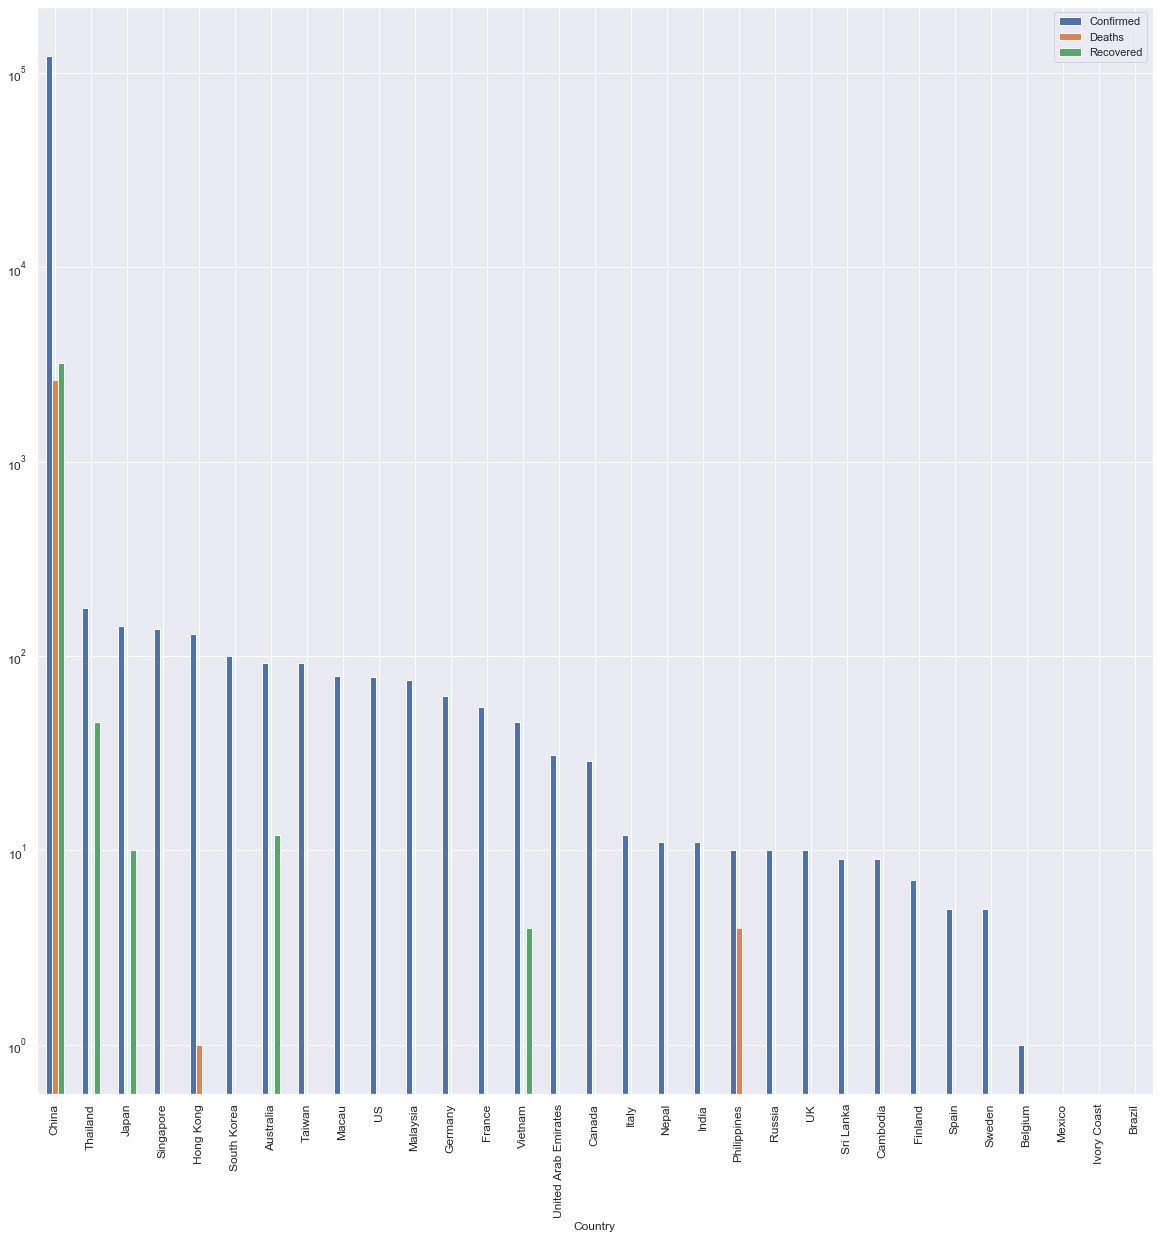

In [48]:
sns.set(color_codes=True)
Confirmed.plot(kind="bar",figsize=(20,20),fontsize=12,logy=True)

## 5. Show and visualize global spread of the coronavirus cases over time 

In [40]:
df['Date'] = df['Date'].apply(pd.to_datetime)
df.set_index('Last Update', inplace = True)
df.head()

,Sno,Date,Province/State,Country,Confirmed,Deaths,Recovered
Last Update,,,,,,,
01/22/2020 12:00:00,1,2020-01-22 12:00:00,Anhui,China,1.0,0.0,0.0
01/22/2020 12:00:00,2,2020-01-22 12:00:00,Beijing,China,14.0,0.0,0.0
01/22/2020 12:00:00,3,2020-01-22 12:00:00,Chongqing,China,6.0,0.0,0.0
01/22/2020 12:00:00,4,2020-01-22 12:00:00,Fujian,China,1.0,0.0,0.0
01/22/2020 12:00:00,5,2020-01-22 12:00:00,Gansu,China,0.0,0.0,0.0


In [43]:
df['date'] = df['Date'].dt.date
df

,Sno,Date,Province/State,Country,Confirmed,Deaths,Recovered,date
Last Update,,,,,,,,
01/22/2020 12:00:00,1,2020-01-22 12:00:00,Anhui,China,1.0,0.0,0.0,2020-01-22
01/22/2020 12:00:00,2,2020-01-22 12:00:00,Beijing,China,14.0,0.0,0.0,2020-01-22
01/22/2020 12:00:00,3,2020-01-22 12:00:00,Chongqing,China,6.0,0.0,0.0,2020-01-22
01/22/2020 12:00:00,4,2020-01-22 12:00:00,Fujian,China,1.0,0.0,0.0,2020-01-22
01/22/2020 12:00:00,5,2020-01-22 12:00:00,Gansu,China,0.0,0.0,0.0,2020-01-22
...,...,...,...,...,...,...,...,...
2020-01-02 19:43:00,766,2020-02-04 22:00:00,"Boston, MA",US,1.0,0.0,0.0,2020-02-04
2020-01-02 19:53:00,767,2020-02-04 22:00:00,"Los Angeles, CA",US,1.0,0.0,0.0,2020-02-04
2020-01-02 19:53:00,768,2020-02-04 22:00:00,"Orange, CA",US,1.0,0.0,0.0,2020-02-04


## 6. Show relation between confirmed cases and deaths case in linear regression

In [57]:
Relation = df.groupby('date')["Confirmed", "Deaths"].sum()
Relation


C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Confirmed,Deaths
date,,
2020-01-22,555.0,0.0
2020-01-23,653.0,18.0
2020-01-24,941.0,26.0
2020-01-25,2019.0,56.0
2020-01-26,2794.0,80.0
2020-01-27,4473.0,107.0
2020-01-28,6057.0,132.0
2020-01-29,7783.0,170.0
2020-01-30,9776.0,213.0


In [85]:
p = np.poly1d(np.polyfit(Dependence.Confirmed,Dependence.Deaths,1))
p

poly1d([ 0.02016875, 11.28450599])

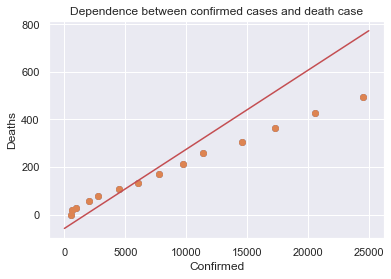

In [90]:

axes = plt.axes()
plt.scatter(Dependence.Confirmed, Dependence.Deaths)
plt.xlabel('Confirmed')
plt.ylabel('Deaths')
plt.title('Dependence between confirmed cases and death case')

xp = np.linspace(0, 25000, 3)
plt.plot(xp,p(xp),c = 'r')
plt.scatter(Dependence.Confirmed, Dependence.Deaths)
plt.show()


## 7. Show dependence between confirmed cases and recovered case in linear regression

In [56]:
Dependence = df.groupby('date')["Confirmed", "Deaths", "Recovered"].sum()
Dependence


C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Confirmed,Deaths,Recovered
date,,,
2020-01-22,555.0,0.0,0.0
2020-01-23,653.0,18.0,30.0
2020-01-24,941.0,26.0,36.0
2020-01-25,2019.0,56.0,49.0
2020-01-26,2794.0,80.0,54.0
2020-01-27,4473.0,107.0,63.0
2020-01-28,6057.0,132.0,110.0
2020-01-29,7783.0,170.0,133.0
2020-01-30,9776.0,213.0,187.0


In [103]:
p = np.poly1d(np.polyfit(Dependence.Confirmed,Dependence.Recovered,1))
p

poly1d([ 3.32181670e-02, -5.81280768e+01])

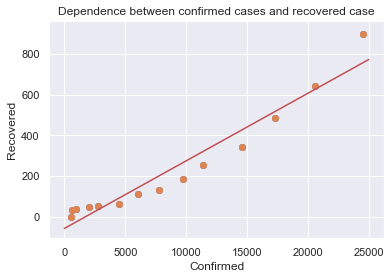

In [104]:

axes = plt.axes()
plt.scatter(Dependence.Confirmed, Dependence.Recovered)
plt.xlabel('Confirmed')
plt.ylabel('Recovered')
plt.title('Dependence between confirmed cases and recovered case')

xp = np.linspace(0, 25000, 3)
plt.plot(xp,p(xp),c = 'r')
plt.scatter(Dependence.Confirmed, Dependence.Recovered)
plt.show()


In [105]:
r2_train= r2_score(Dependence.Recovered,p(Dependence.Confirmed))
print(r2_train)


0.9384390923209045


NameError: name 'r3_score' is not defined